# Classification

## Plan

### Use Case

Über die Website des Unternehmens sollen Kunden Immobilien finden. Hierzu sind einige Filter zu setzen, die die Menge an Immobilienanzeigen reduziert und nur diejenigen anzeigt, welche für den Kunden interessant sind. Hierzu muss die Immobilie anhand ihrer Eigenschaften in verschiedene Klassen klassifiziert werden. Das Unternehmen möchte ihren Kunden die Möglichkeit geben, speziell nach luxuriösen Wohnungen zu filtern. Stand jetzt müssen Mitarbeiter manuell Immobilien als luxuriös klassifizieren, was zukünftig durch ein Modell ersetzt werden soll.

### Problematik

Wir benötigen ein Modell welches Immobilien anhand von Eigenschaften in eine von zwei Klassen klassifiziert. Das Ziel ist, diese Klassen ohne menschliches Zutun zu erstellen und dies mit einer hohen Genauigkeit. Im Speziellen wollen wir die Immobilie als luxuriös oder basic (normal) klassifizieren. Diese Klassifikation soll anhand von relevanten Faktoren erfolgen, welche die Immobilie genauer beschreiben. </br>
Das Modell soll Experten aus dem Unternehmen bei der Immobilienanzeigenerstellung Arbeit abnehmen und den Kunden weitere Möglichekeiten liefern, Anzeigen nach ihren Wünschen zu präzisieren.

### Variablen

Es werden strukturierte Immobiliendaten verwendet. Die relevanten Variablen zur Identifikation vom Immobilienstatus (luxoriös oder basic) müssen identifiziert werden und dessen Aussagekraft analysiert werden, um herauszufinden, was die Faktoren sind, welche Luxusimmobilien von anderen unterscheiden.



### Metriken

Als Erfolg wird das Modell beurteilt, wenn eine Modellgenauigkeit von mindestens 90% erreicht wird. Unser Modell gilt als gescheitert, wenn das Modell zu ungenau ist bzw. zu viele False Negative/Positive. 

## Data

### Datenimport

Importieren aller libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Daten einfügen und Spaltennamen vergeben

In [2]:
data=pd.read_csv("ParisHousingClass.csv")

### Datenexploration und Erkenntnisgewinn

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

Auffällig ist, dass der Datentyp von category object ist.

In [4]:
x = data.drop("category" , axis = 1)
y = data['category']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [6]:
df_train = pd.DataFrame(X_train.copy())
df_train = df_train.join(pd.DataFrame(y_train))

In [7]:
df_train.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03
mean,49576.729875,50.580625,0.507250,0.496750,50.170000,50338.934500,5.520750,5.516000,2005.556250,0.497375,0.499250,5042.218750,5022.901125,550.559500,0.499875,4.972125,4.964092e+06
std,28557.941008,28.814298,0.499979,0.500021,28.938586,28907.555953,2.876518,2.861209,9.317292,0.500024,0.500031,2878.466674,2899.771979,262.338146,0.500031,3.163281,2.855775e+06
min,89.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,1.000000,1.000000,100.000000,0.000000,0.000000,1.031350e+04
25%,25019.500000,26.000000,0.000000,0.000000,25.000000,25223.500000,3.000000,3.000000,1997.000000,0.000000,0.000000,2566.000000,2500.750000,325.000000,0.000000,2.000000,2.511409e+06
50%,49819.000000,51.000000,1.000000,0.000000,50.000000,50693.000000,6.000000,5.000000,2006.000000,0.000000,0.000000,5140.500000,5056.000000,549.000000,0.000000,5.000000,4.987189e+06
75%,73984.250000,75.000000,1.000000,1.000000,76.000000,75592.500000,8.000000,8.000000,2014.000000,1.000000,1.000000,7523.250000,7534.250000,777.000000,1.000000,8.000000,7.405852e+06
max,99952.000000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.000000,1.000000,1.000000,10000.000000,10000.000000,1000.000000,1.000000,10.000000,9.998411e+06


Es fällt auf, dass category hier fehlt

In [8]:
df_train.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
9254,81531,57,0,1,2,53236,7,1,1990,0,0,6192,9969,736,1,2,8158198.0,Basic
1561,78731,88,0,0,79,78649,7,6,1991,1,1,5914,6048,742,0,3,7878473.1,Basic
1670,78004,71,1,1,96,39708,10,10,1990,1,1,4527,2138,329,1,6,7816750.0,Luxury
6087,15727,25,1,0,55,17489,1,7,2007,0,1,8350,1546,859,1,8,1577602.7,Basic
6669,3190,59,0,0,95,35955,6,6,2004,1,1,9709,6168,338,0,5,322180.4,Basic


Category scheint das ideale Zielattribut (target feature) zu sein, welches vom Modell zukünftig klassifiziert werden soll.

In [9]:
df_train['category'].unique()

array(['Basic', 'Luxury'], dtype=object)

Hier sehen wir, dass category Basic und Luxury als values besitzt. 

### Datenbereinigung und -transformation

In [10]:
df_train.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

Keine fehlenden Werte

In [11]:
df_train.drop_duplicates(inplace=True)
df_train.info() # Vergleich mit vorherigem data.info() un zu sehen, ob Values fehlen

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       8000 non-null   int64  
 1   numberOfRooms      8000 non-null   int64  
 2   hasYard            8000 non-null   int64  
 3   hasPool            8000 non-null   int64  
 4   floors             8000 non-null   int64  
 5   cityCode           8000 non-null   int64  
 6   cityPartRange      8000 non-null   int64  
 7   numPrevOwners      8000 non-null   int64  
 8   made               8000 non-null   int64  
 9   isNewBuilt         8000 non-null   int64  
 10  hasStormProtector  8000 non-null   int64  
 11  basement           8000 non-null   int64  
 12  attic              8000 non-null   int64  
 13  garage             8000 non-null   int64  
 14  hasStorageRoom     8000 non-null   int64  
 15  hasGuestRoom       8000 non-null   int64  
 16  price              80

Keine Duplikate!

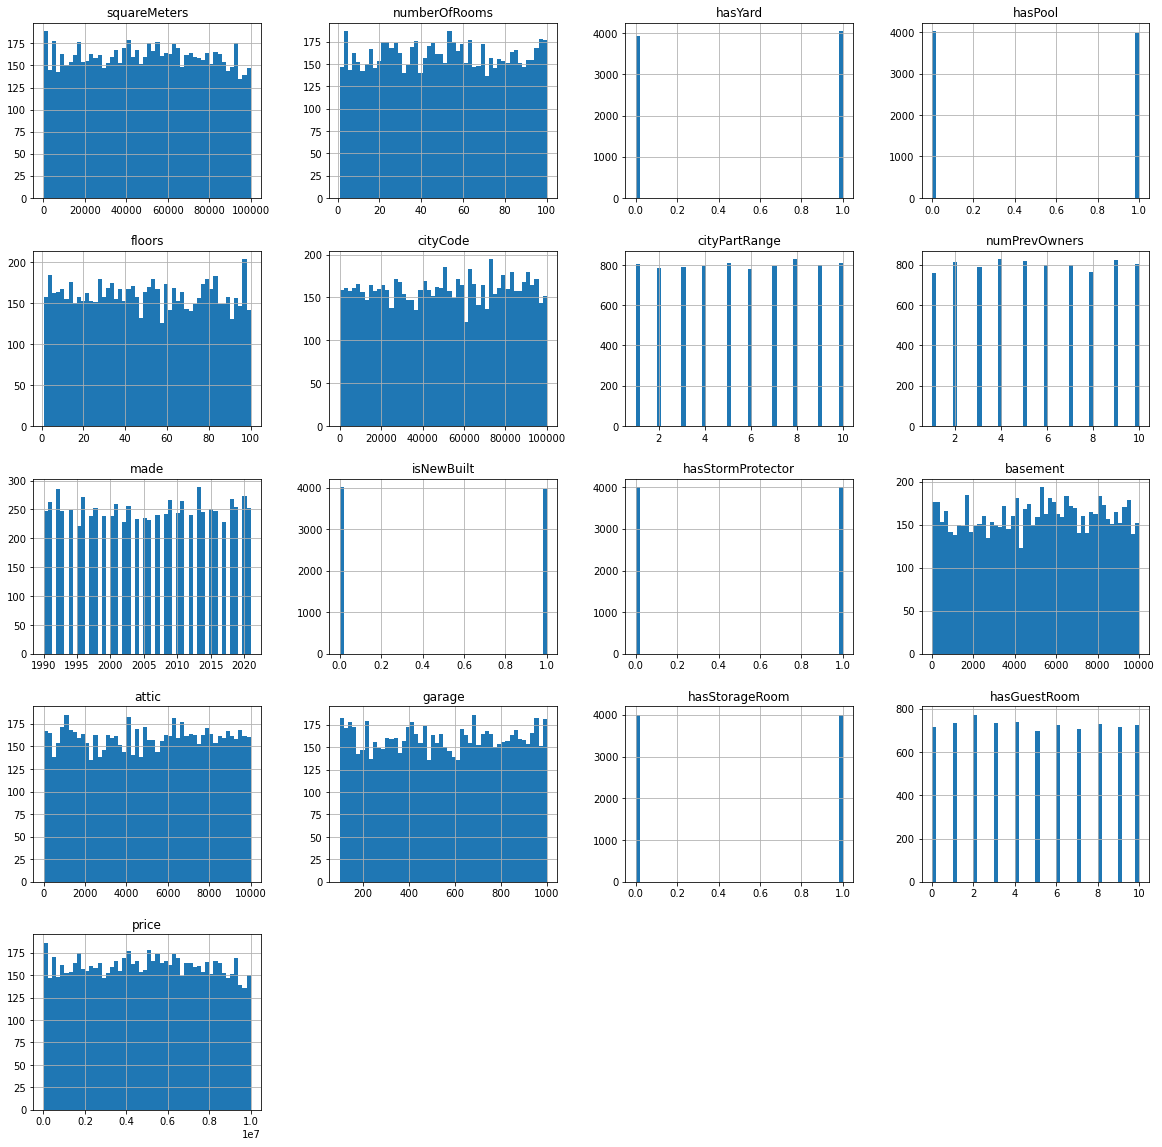

In [12]:
df_train.hist(bins = 50, figsize = (20,20))
plt.show()

Es scheinen keine Unregelmäßigkeiten im Datensatz zu bestehen. 

<AxesSubplot:>

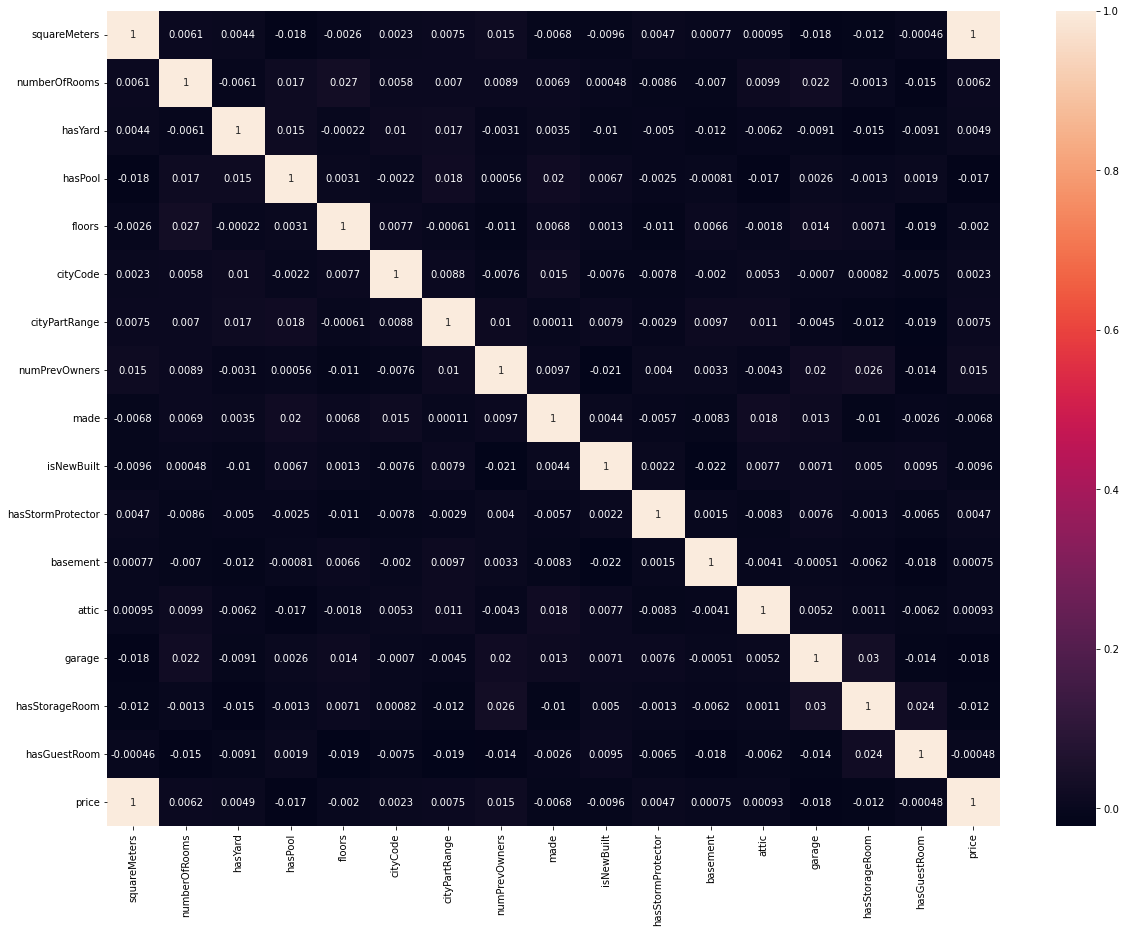

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(),annot = True)

Price und squareMeters korrelieren sehr stark, jedoch fehlt unser Target Feature Category!

Damit wir mit Category arbeiten können, muss das Feature normalisiert werden (Values müssen in numerische Values verändert werden).

In [14]:
df_train['category'].replace("Basic", 0 , inplace = True)
df_train['category'].replace("Luxury", 1 , inplace = True)
df_train['category'].unique() # category values anzeigen lassen

array([0, 1], dtype=int64)

<AxesSubplot:>

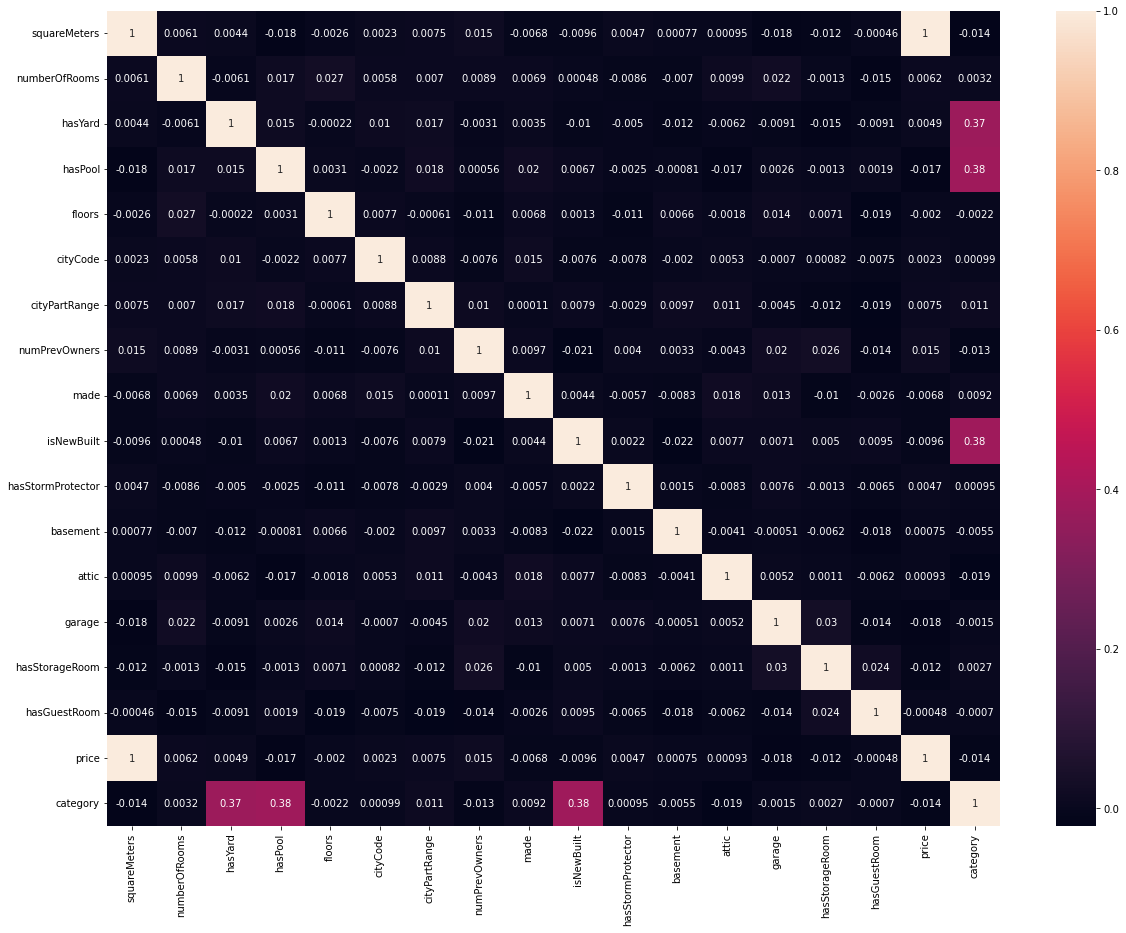

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(), annot = True)

Diesmal wird auch unser Zielattribut (target feature) category angezeigt. hasYard, hasPool und isNewBuilt scheinen eine starke Korrelation mit category zu haben. Die restlichen Features scheinen kaum korrelation mit category zu haben. </br>
Aufgrund der hohen Korrelation von Price und squareMeters müssen wir eines davon entfernen.

In [16]:
df_train = df_train.drop(["price"], axis = 1)

### Datenaufbereitung

<AxesSubplot:xlabel='category', ylabel='count'>

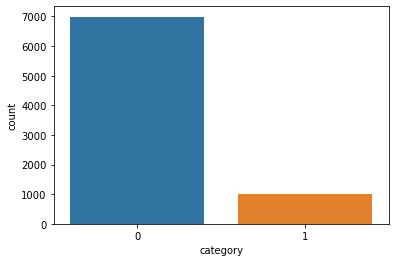

In [17]:
sns.countplot( x = df_train['category'])

Es gibt weitaus weniger Luxuswohnungen als Basic Wohnungen. 0 = Basic, 1 = Luxury

<AxesSubplot:xlabel='hasPool', ylabel='count'>

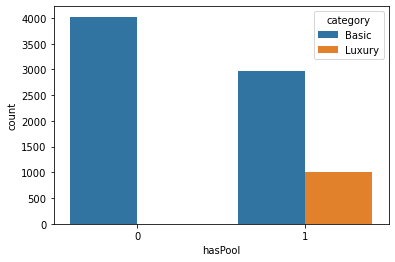

In [18]:
sns.countplot(x = df_train["hasPool"], hue=data["category"])

Luxuswohnungen müssen einen Pool besitzen, jedoch ist nicht jede Wohnung mit Pool eine Luxuswohnung

<AxesSubplot:xlabel='isNewBuilt', ylabel='count'>

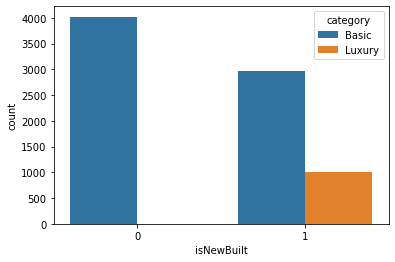

In [19]:
sns.countplot(x = df_train["isNewBuilt"], hue=data["category"])

Luxuswohnungen müssen Neubauten sein, jedoch ist nicht jede neugebaute Wohnung eine Luxuswohnung

<AxesSubplot:xlabel='hasYard', ylabel='count'>

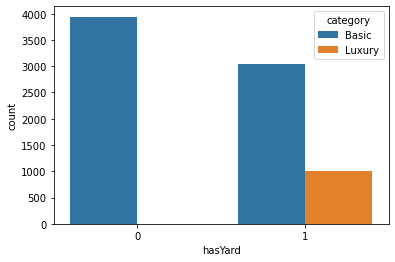

In [20]:
sns.countplot(x = df_train["hasYard"], hue=data["category"])

Luxuswohnungen müssen einen Garten besitzen, jedoch ist nicht jede Wohnung mit Garten eine Luxuswohnung

Von den Visulisierungen stellen wir fest, dass Luxuswohnungen immer einen Garten und einen Pool haben, sowie immer ein Neubau sind. Um sicher zu gehen, dass dies nicht bei allen Variablen der Fall ist, testen wir dies einmal mit hasStormProtector.

<AxesSubplot:xlabel='hasStormProtector', ylabel='count'>

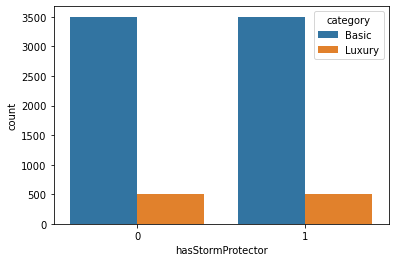

In [21]:
sns.countplot(x = df_train["hasStormProtector"], hue=data["category"])

Vergleichen wir die Variable hasStormProtector fällt auf, dass es auch Luxuswohnungen ohne Blitzableiter gibt.

Auf den Einsatz von Feature Scaling (z.B. StandardScaler) wird bewusst verzichtet um dieses später zu verwenden!

## Modell

### Modellauswahl

Ensemble Methoden wie Random Forest Classifier Modelle kombinieren mehrere Klassifiaktionsmodellvorhersagen und eine besonders hohe Genauigkeit zu erreichen, was für unseren Use Case eine Vorraussetzung ist. Außerdem eignet sich das Modell für große Datensätze und overfittet nur selten.

### Modellerstellung

Modelltraining mit Trainingsdaten

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50) # n_estimators gibt die Menge an Bäumen an
rf.fit(X_train, y_train)
rf.score(X_train,y_train)


1.0

Anwendung mit Testdaten

In [23]:
y_pred = rf.predict(X_test)
rf.score(X_test,y_test)

1.0

### Modellevaluation 

array([[1744,    0],
       [   0,  256]], dtype=int64)

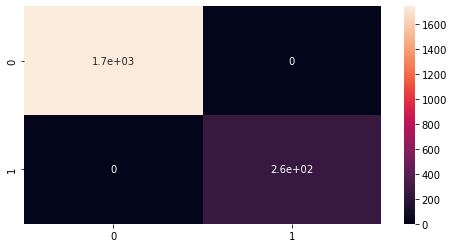

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize = (8,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
confusion_matrix(y_test, y_pred) # Um Zahlen genau anzuzeigen!

True Positive: 1744 der Wohnungen wurden als Basic (0) klassifiziert und waren auch Basic (0)
True Negative: 256 der Wohnungen wurden als Luxus (1) klassifiziert und waren auch Luxus (1)
Keine False Positive/Negative Fälle durch den RandomForestClassifier --> 100% Genauigkeit!

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      1744
      Luxury       1.00      1.00      1.00       256

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Extra Umsetzung mit K Nearest Neighbors als Vergleich zu RandomForestClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train, y_train)
knc.score(X_train,y_train)

0.889

In [27]:
y_pred = knc.predict(X_test)
knc.score(X_test,y_test)

0.8415

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       Basic       0.87      0.96      0.91      1744
      Luxury       0.11      0.04      0.05       256

    accuracy                           0.84      2000
   macro avg       0.49      0.50      0.48      2000
weighted avg       0.77      0.84      0.80      2000



array([[1674,   70],
       [ 247,    9]], dtype=int64)

Genauigkeit von KNN Modell sehr viel schlechter!

Um die Genauigkeit zu erhöhen könnte eine Standardisierung zur Skalierung unserer Features helfen.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3 )
knc.fit(X_train, Y_train)
knc.score(X_train,Y_train)

0.998375

In [31]:
y_pred = knc.predict(X_test)
knc.score(X_test,Y_test)

0.9925

In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

confusion_matrix(Y_test, y_pred)

              precision    recall  f1-score   support

       Basic       0.99      1.00      1.00      1747
      Luxury       0.98      0.96      0.97       253

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



array([[1742,    5],
       [  10,  243]], dtype=int64)

Nun erreicht auch der KNeighborsClassifier eine sehr gute Genauigkeit (nahezu perfekt)

### Interpretation

Anhand der Daten wird schnell klar, was die Gemeinsamkeiten von Luxusimmobilien zueinander sind und was diese von normalen (basic) Immobilien unterscheidet. Durch das Random Forest Classifer Modell kann wird eine 100%ige Genauigkeit erreicht, wenn es darum geht, die Kategorie einer Immobilie bestimmt werden. Die hohe Genauigkeit hängt stark mit den zugrundeliegenden Daten zusammen, welche strukturiert und fehlerfrei sind und sich optimal für Klassifikationsmodelle eignen, da besonders 3 Variablen ausschlaggebend für einen Luxusimmobilie sind. Im Vergleich mit dem zweiten Modell fällt auf, wie gut das Random Forest Modell wirklich ist. Besonders die Genauigkeit bei der Klassifikation von class 1 (Luxusimmobilien) mit dem KNearestClassifier Modell ist untragbar, glücklicherweiße funktioniert das Random Forest Classifier Modell einwandfrei.